## Importing Libraries

In [150]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Loading Model

In [151]:
model  = tf.keras.models.load_model('trained_model1.keras')

In [152]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Visualizaing Single Image of Test set

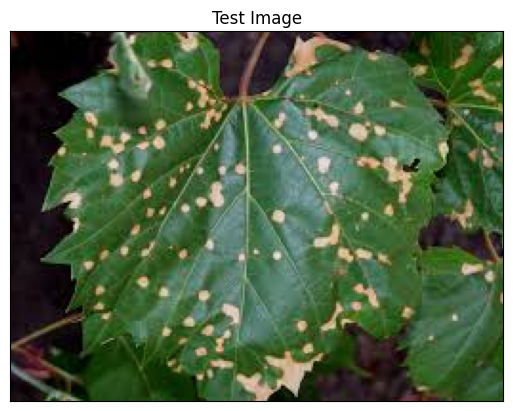

In [251]:
import cv2
image_path = "test/test/images5.jpg"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [252]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [253]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 26ms/step


(array([[1.7536184e-04, 3.5457069e-05, 5.1472330e-04, 2.5205583e-07,
         3.3159351e-03, 5.0376322e-08, 5.7160319e-04, 2.3964666e-04,
         1.6696966e-05, 5.9140362e-05, 1.4357332e-08, 9.9101567e-01,
         9.1882731e-04, 9.3140670e-08, 7.7704295e-05, 1.6701505e-07,
         1.6924535e-07, 7.2203533e-05, 7.9823850e-04, 9.5005305e-07,
         1.0107476e-04, 1.1721244e-04, 2.6615854e-07, 2.1895369e-04,
         1.8643945e-05, 4.0445752e-06, 1.6252180e-06, 6.3751031e-06,
         4.6178102e-05, 2.9684554e-06, 1.5237262e-05, 3.8703556e-06,
         1.5909249e-03, 1.7405274e-08, 3.7254313e-07, 4.8030242e-06,
         1.7307773e-05, 3.7157806e-05]], dtype=float32),
 (1, 38))

In [254]:
result_index = np.argmax(prediction)
result_index

11

In [255]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

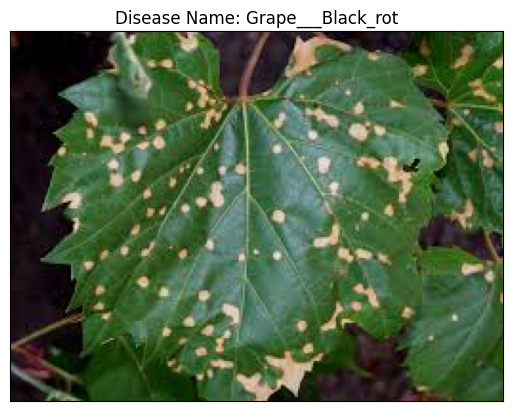

In [256]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [257]:
model_prediction

'Grape___Black_rot'